<a href="https://colab.research.google.com/github/amnanjum01/PythonEDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import skew
from typing import Dict

In [ ]:
from scipy import stats

In [ ]:
missingdf = pd.read_csv('/content/supermarket_sales_dirty.csv')

# APIs

In [ ]:
#API to generate random time between the time range 10:00 and 20:59

import datetime
import random

def generate_random_times(df_col):
    missing_mask = pd.isnull(df_col)
    missing_count = missing_mask.sum()
    if missing_count > 0:
        start_time = datetime.time(10, 0)
        end_time = datetime.time(20, 59)
        time_diff = datetime.datetime.combine(datetime.date.today(), end_time) - datetime.datetime.combine(datetime.date.today(), start_time)
        random_times = [datetime.datetime.combine(datetime.date.today(), start_time) + datetime.timedelta(minutes=random.randrange(time_diff.seconds//60)) for i in range(missing_count)]
        random_time_strs = [time.strftime("%H:%M") for time in random_times]
        df_col.loc[missing_mask] = random_time_strs
    return df_col


In [ ]:
#API to make a normality plot of given column names and then calculate the skewness and kurtosis
def normality_plots(cols, df):
    for col in cols:
        data = df[col].dropna()
        mean = np.mean(data)
        std_dev = np.std(data)
        x_values = np.linspace(data.min(), data.max(), len(data))
        y_values = norm.pdf(x_values, mean, std_dev)
        plt.plot(x_values, y_values)
        plt.xlabel(col)
        plt.ylabel('Probability density')
        plt.title(f"{col} Normal distribution")
        kurt = kurtosis(data, nan_policy='omit')
        skewness = skew(data, nan_policy='omit')
        print(f"{col} Kurtosis:", kurt)
        print(f"{col} Skewness:", skewness)
        plt.show()


In [ ]:
#API to make bar graphs of given column names
def bar_plots(cols, df):
    for col in cols:
        data = df[col].value_counts().sort_index()
        plt.bar(data.index, data)
        plt.xlabel(col)
        plt.title(f"{col} Bar chart")
        plt.show()

In [ ]:
#API to make box plots of given column names
def box_plots(cols, df):
    for col in cols:
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        plt.boxplot(data, vert=False)
        plt.xlabel(col)
        plt.title(f"{col} Box plot")
        plt.show()

In [ ]:
#API to replace string values in numeric columns with NaN value. We use this to clean the numeric columns
#which had dirty data

def clean_numeric_replace(cols, df):
  for col in cols:
    if pd.to_numeric(df[col], errors='coerce').notnull().all():
        print('Column ', [col], ' has only numeric datatype values')
    else:
        print('Column ', [col], ' has non-numeric datatype values')

      # Replace non-numeric values in column A with a special character
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(np.nan)

In [ ]:
#API to run chi square test between two columns given as argument

from scipy.stats import chi2_contingency

def chi_square_test(col1, col2, df):
    
    # Create contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])

    # Perform chi-square test of independence
    chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

    # Print results
    print("Chi-square test statistic: ", chi2)
    print("p-value: ", p_value)
    print("Degrees of freedom: ", dof)
    print("Expected frequencies: \n", expected_freq)

In [ ]:
#API to run ANOVA test between two columns given as argument

import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(dependent_var, categorical_var, df):
    
    # Fit the ANOVA model
    model = ols(f'{dependent_var} ~ C({categorical_var})', data=df).fit()

    # Perform the ANOVA test
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Print the ANOVA table
    print(anova_table)



In [ ]:
def rainbow_scatter(df, x_col, y_col):

    # Get the x and y variables
    x = df[x_col]
    y = df[y_col]
    
    # Get the color variable (last column in the DataFrame)
    color_col = df.columns[-1]
    colors = df[color_col]
    
    # Normalize the color variable to range from 0 to 1
    norm = plt.Normalize(colors.min(), colors.max())
    
    # Create a scatter plot with colored markers
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=colors, cmap='rainbow', norm=norm, alpha=0.7)
    
    # Add a colorbar legend
    cbar = fig.colorbar(scatter)
    cbar.ax.set_ylabel(color_col)
    
    # Set the axis labels
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    
    # Show the plot
    plt.show()


In [ ]:
missingdf.isnull().sum()

Invoice ID                 95
Branch                     19
City                        4
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    4
Tax 5%                      0
Total                       3
Date                        0
Time                       35
Payment                     9
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64

# Checking for inconsistencies and data entry errors



1.   Before moving ahead with any sort of analysis or missing value strategies, we check for inconsistencies and data entry errors
2.   For each column, we check the unique values and see if the values present make sense. For example, a string column for Payment should not have values such as 444 or a Quantity column should not contain strings such as 'same'.
3.   This way we also find out spelling errors
4.   Therefore, we replace these abnormal values with missing value, NaN. We also fix the spelling errors.

Specific explanation for each column is given in the comments of that code.

Note: Columns such as cities which had a limited dataset were checked here. Others such as time, date, Invoice ID were checked on the excel sheet using filters



In [ ]:
unique_values = set(missingdf['Branch'])

# Print the unique values and count
print(unique_values)
print(len(unique_values))

{'B', nan, 'A', 'C'}
4


In [ ]:
unique_values = set(missingdf['City'])

# Print the unique values and count
print(unique_values)
print(len(unique_values))

{nan, 'Mandalay', 'Yangon', 'Naypyitawe', 'Yangon0', 'Naypyitawp', 'Naypyitaw', 'Yangono', 'Naypyitay'}
9


In [ ]:
#fix spelling errors for cities
missingdf['City'] = missingdf['City'].apply(lambda x: 'Yangon' if x == 'Yangon0' else x)
missingdf['City'] = missingdf['City'].apply(lambda x: 'Yangon' if x == 'Yangono' else x)
missingdf['City'] = missingdf['City'].apply(lambda x: 'Naypyitaw' if x == 'Naypyitay' else x)
missingdf['City'] = missingdf['City'].apply(lambda x: 'Naypyitaw' if x == 'Naypyitawe' else x)
missingdf['City'] = missingdf['City'].apply(lambda x: 'Naypyitaw' if x == 'Naypyitawp' else x)
missingdf['City'] = missingdf['City'].apply(lambda x: 'Naypyitaw' if x == 'Naypitaw' else x)

In [ ]:
#make sure the changes were implemented

unique_values = set(missingdf['City'])

# Print the unique values and count
print(unique_values)
print(len(unique_values))

{nan, 'Naypyitaw', 'Mandalay', 'Yangon'}
4


In [ ]:
unique_values = set(missingdf['Gender'])

# Print the unique values and count
print(unique_values)
print(len(unique_values))

{'Male', 'Female', nan}
3


In [ ]:
unique_values = set(missingdf['Customer type'])

# Print the unique values and count
print(unique_values)
print(len(unique_values))

{'Normal', 'Member'}
2


In [ ]:
unique_values = set(missingdf['Product line'])

# Print the unique values and count
print(unique_values)
print(len(unique_values))

{nan, 'Home and lifestyle', 'Food and beverages', 'Electronic access', 'Sports and travel', 'Food and bever', 'Fashion access', 'Electronic accessories+F327', 'Home and lifest', 'Electr', 'Sports and tr', 'Electronic accessories', 'Fashion accessories', 'Electronic a', 'Health and bea', 'Health and beauty', 'Sports and tra'}
17


In [ ]:
#fixing spelling/data entry errors in Product line

missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Electronic accessories' if x == 'Electronic access' else x)
missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Electronic accessories' if x == 'Electr' else x)
missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Electronic accessories' if x == 'Electronic a' else x)
missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Electronic accessories' if x == 'Electronic accessories+F327' else x)
missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Fashion accessories' if x == 'Fashion access' else x)
missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Sports and travel' if x == 'Sports and tr' else x)
missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Sports and travel' if x == 'Sports and tra' else x)
missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Health and beauty' if x == 'Health and bea' else x)
missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Home and lifestyle' if x == 'Home and lifest' else x)
missingdf['Product line'] = missingdf['Product line'].apply(lambda x: 'Food and beverages' if x == 'Food and bever' else x)

In [ ]:
#check if the changes were implemented

unique_values = set(missingdf['Product line'])

# Print the unique values and count
print(unique_values)
print(len(unique_values))

{nan, 'Home and lifestyle', 'Food and beverages', 'Sports and travel', 'Electronic accessories', 'Fashion accessories', 'Health and beauty'}
7


In [ ]:
#using the API made above, here we pass columns that should have numeric values but noticed non numeric characters in
#this will replace all those values with NaN

clean_numeric_replace(['Total', 'gross margin percentage', 'gross income', 'Quantity'], missingdf)

Column  ['Total']  has non-numeric datatype values
Column  ['gross margin percentage']  has non-numeric datatype values
Column  ['gross income']  has non-numeric datatype values
Column  ['Quantity']  has non-numeric datatype values


In [ ]:
#check to see if there are any out of the ordinary values in Payment

unique_values = set(missingdf['Payment'])

# Print the unique values and count
print(unique_values)
print(len(unique_values))

{'Credit card', nan, '123', '444', '98', 'Ewallet', '332', 'Cash'}
8


In [ ]:
#Replace values in 'Payment' column that are not 'Credit card', 'Ewallet', or 'Cash' with NaN
missingdf.loc[~missingdf['Payment'].isin(['Credit card', 'Ewallet', 'Cash']), 'Payment'] = np.nan


In [ ]:
#here we noticed some dates had incorrect years such as 1900 or entirely missing. We also noticed that majority of the
#data was in the first quarter of 2019. Therefore, we fixed the years accordingly. To reflect that they were also in 2019

missingdf['Date'] = missingdf['Date'].replace('1/22/1900', '1/22/2019')
missingdf['Date'] = missingdf['Date'].replace('2/5/2018', '2/5/2019')
missingdf['Date'] = missingdf['Date'].replace('2/15/2018', '2/15/2019')
missingdf['Date'] = missingdf['Date'].replace('1/10/', '1/10/2019')
missingdf['Date'] = missingdf['Date'].replace('1/28/', '1/28/2019')
missingdf['Date'] = missingdf['Date'].replace('1/6/', '1/6/2019')

In [ ]:
#here, we generated random months between the first and the third month to replace the date that was missing a month
#the random generation was to avoid any sort of bias.
#same was done for the two dates that were missing the day. We generated random days of the month to avoid bias

import random

day = random.randint(1, 28)
day2=random.randint(1, 31)
month=random.randint(1,3)

missingdf['Date'] = missingdf['Date'].replace('2//2019', '2/'+str(day)+'/2019')
missingdf['Date'] = missingdf['Date'].replace('3//2019', '3/'+str(day2)+'/2019')
missingdf['Date'] = missingdf['Date'].replace('/26/2019', str(month)+'/26/2019')

# Outlier and Anomaly Analysis



Now that we have dealt with inconsistent values, we move on to outlier analyis
1.   Here we first use the API we made above to make box plots
2.   We will be checking for outliers, and dealing with the potentially troublesome ones
3.   We will also be studying any possible anomalies



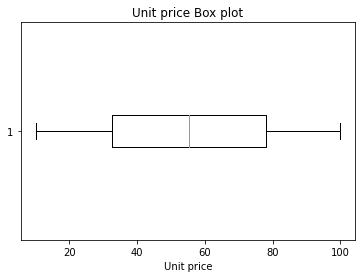

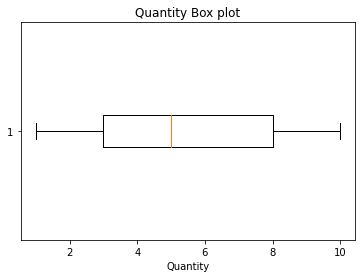

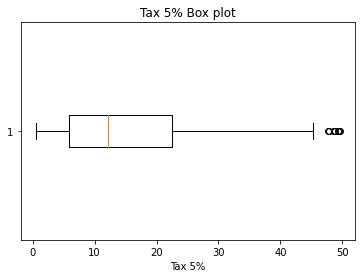

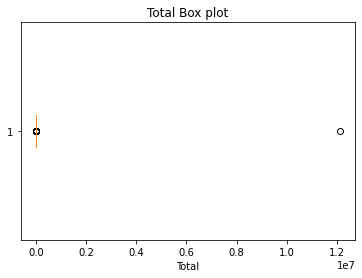

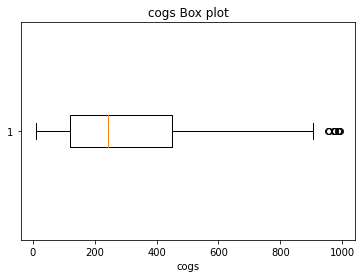

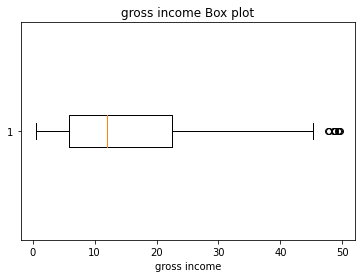

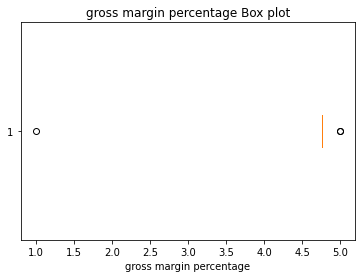

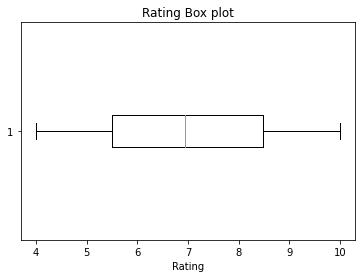

In [ ]:
box_plots(['Unit price','Quantity','Tax 5%','Total','cogs', 'gross income', 'gross margin percentage', 'Rating'], missingdf)



1.   We first deal with all the outliers. We can see abnormally large values in the Total boxplot
2.   We also see outliers in the 'gross margin percentage' plot, that upon inspection turned out to be incorrect calculation. 
3.   So both are dealt with below



In [ ]:
#Replace the erranous values in gross margin percentage with the correct calculated values

missingdf['gross margin percentage'] = missingdf['gross margin percentage'].replace(5, 4.761904762)
missingdf['gross margin percentage'] = missingdf['gross margin percentage'].replace(1, 4.761904762)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross margin percentage'>

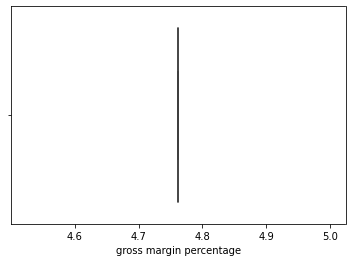

In [ ]:
#after fixing outliers in gross margin percentage
sns.boxplot(missingdf['gross margin percentage'])

In [ ]:
#fixing first outlier. Here we are replacing it with NaN only. We will fill in the correct value with calculation later
#along with the other missing values
missingdf['Total'] = missingdf['Total'].replace(12121555, np.nan)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total'>

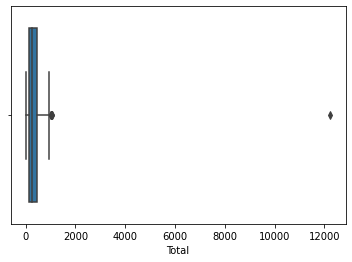

In [ ]:
#after fixing first outlier and before fixing second
sns.boxplot(missingdf['Total'])

In [ ]:
#fixing second outlier. Same strategy as the first outlier is applied here
missingdf['Total'] = missingdf['Total'].replace(12234, np.nan)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total'>

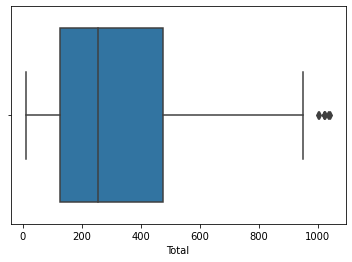

In [ ]:
#after fixing both outliers
sns.boxplot(missingdf['Total'])

Even though we came across further outliers in Tax 5%, Total, cogs, and gross income, we identify that since these columns are related to each other on basis of calculation and these particular outliers were a result of high unit price and then items bought in a higher quantity. 

There was no data entry error. The presence of outliers is justified.

There is also no identifiable pattern which might lead us to classify the outliers as anomaly 

In [ ]:
#just to show that the price and quantity is high, hence the outliers.

Q1 = missingdf['Total'].quantile(0.25)
Q3 = missingdf['Total'].quantile(0.75)
IQR = Q3 - Q1

outliers = missingdf.loc[(missingdf['Total'] < Q1 - 1.5*IQR) | (missingdf['Total'] > Q3 + 1.5*IQR)]

# Print the entire rows where outliers are present
print(outliers)

      Invoice ID Branch       City Customer type  Gender         Product line  \
166  234-65-2137      C  Naypyitaw        Normal    Male   Home and lifestyle   
167  687-47-8271      A     Yangon        Normal    Male  Fashion accessories   
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   
357  554-42-2417      C  Naypyitaw        Normal  Female    Sports and travel   
422  271-88-8734      C  Naypyitaw        Member  Female  Fashion accessories   
557  283-26-5248      C  Naypyitaw        Member  Female   Food and beverages   
699  751-41-9720      C  Naypyitaw        Normal    Male   Home and lifestyle   
792  744-16-7898      B   Mandalay        Normal  Female   Home and lifestyle   
996          NaN      B   Mandalay        Normal  Female   Home and lifestyle   

     Unit price  Quantity  Tax 5%     Total       Date   Time      Payment  \
166       95.58      10.0  47.790  1003.590  1/16/2019  13:32         Cash   
167       98.98      10.0  49.490

# Univariate Analysis



1.   We perform the analysis for numerical and categorical columns separately.
2.   For numeric, we call the API we made above to make normal plots and give the skewness and kurtosis
3.   For categorical data, we will be making bar graphs using API above



Unit price Kurtosis: -1.2250369149837623
Unit price Skewness: 0.007357841796617173


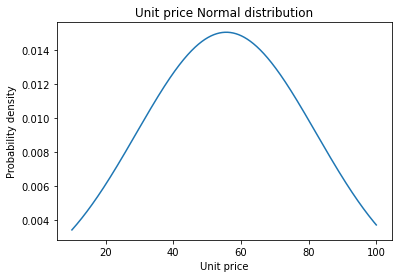

Quantity Kurtosis: -1.2117207892123907
Quantity Skewness: 0.014658365804401562


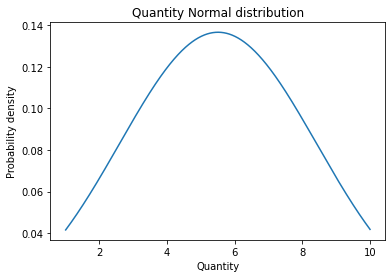

Tax 5% Kurtosis: -0.08746991289328898
Tax 5% Skewness: 0.8912303920037635


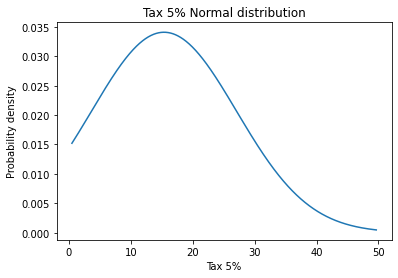

Total Kurtosis: -0.0959850349214788
Total Skewness: 0.8881533425448965


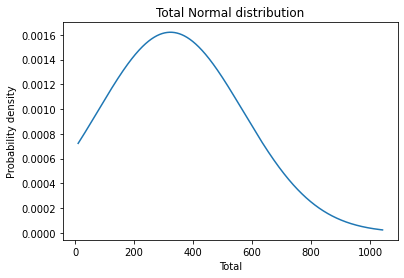

cogs Kurtosis: -0.08541350608123954
cogs Skewness: 0.8927260353479934


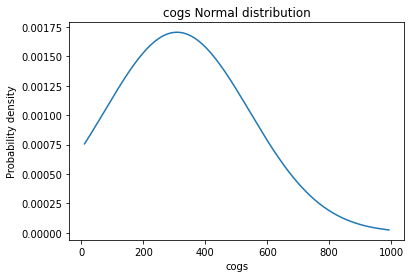

gross margin percentage Kurtosis: nan
gross margin percentage Skewness: nan


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
<ipython-input-9-bbfb1387bdfd>:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(data, nan_policy='omit')
<ipython-input-9-bbfb1387bdfd>:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(data, nan_policy='omit')


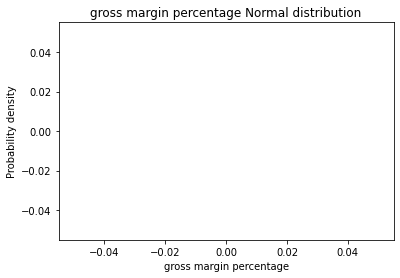

gross income Kurtosis: -0.07414032285366412
gross income Skewness: 0.8935067169755678


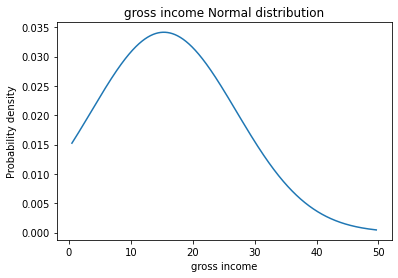

Rating Kurtosis: -1.1486630753792588
Rating Skewness: 0.008299030019175672


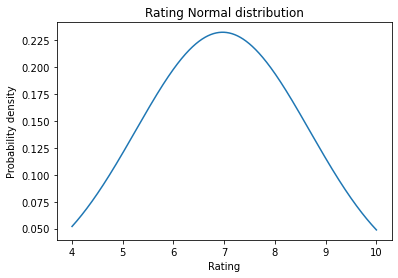

In [ ]:
normality_plots(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating'], missingdf)



1.   Rating, Unit price, and Quantity all are normally distributed more or less. They have little skewness, which means the mean and median are almost equal.
      Their kurtosis is below zero i.e. negative, which implies there are very few extreme values.
2.    Gross margin perctange does not give any normality plot or values for skewness or kurtosis because it has only a single value for all the records.
3.    Total, Tax 5%, gross income, and cogs are all positively skewed which implies that although majority of data is clustered on the left side of the plot, there are a few extreme values in the right, which elongated the tail. This checks out, as we identified outliers (larger than usual spending) above. Those outliers have caused the skewness to be positive.
As for the kurtosis, that is again negative, implying less extreme values than would be in a normal distribution



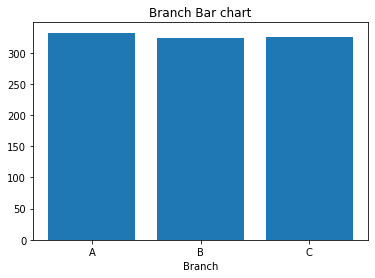

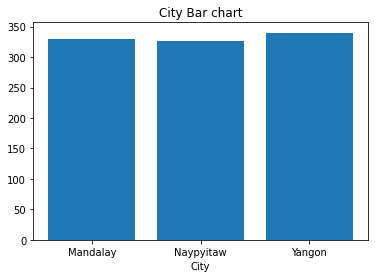

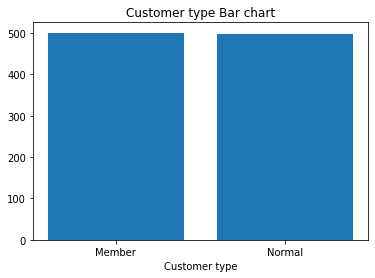

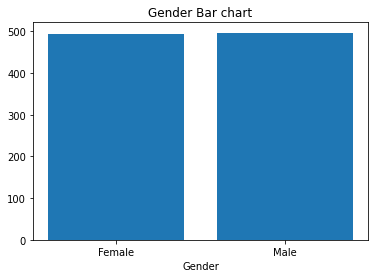

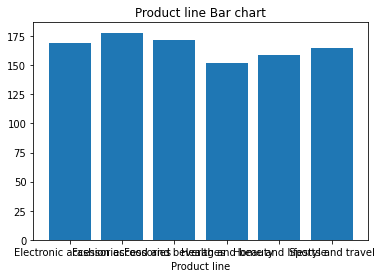

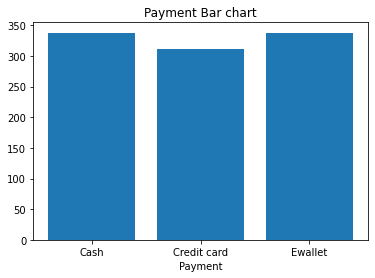

In [ ]:
bar_plots(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], missingdf)



1.   Here, we perform a univariate analysis of sort for categorical columns
2.   There is no such extreme difference to be noted in the the frequencies of categories for each column. That is to say, the data is equally divided between each category




# Bivariate Analysis



1.   Here, we check the relation between different columns/attributes in order to understand them better, as well as to aid us in dealing with missing values later on.
2.   We use a correlation healmap, for numeric columns. 
3.   ANOVA to test between categorical and numeric. 
4.   Finally, we perform Chi Test to gauge any sort of relation between categorical columns where it made sense for example to see if certain products such as electronics were paid for with specific payment types such as ewallet



<AxesSubplot:>

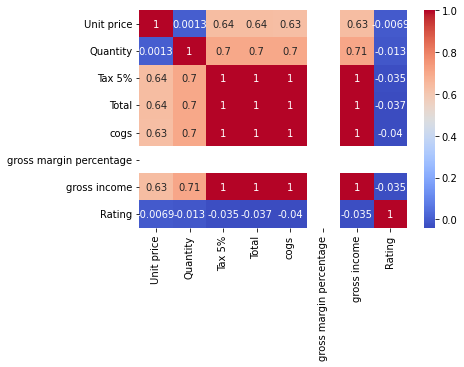

In [ ]:
#we make a correlation heatmap here

corr_matrix = missingdf.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")



1.   This gives us a very good view of relationships between different numeric columns. 
2.   There is a very strong relation (1) between Total, Tax 5%, cogs, and gross income. This allowed us to see that each missing value could be filled by forming equations and then getting a 100% accurate value based on that calculation.
3.   These columns also have a strong relation with Unit price and Quantiy which meant that even though they were not always increasing when the other increased or decreased when the other decreased, they stil affected each other.
4.   Gross margin percentage showed up as white because of its uniform value for all records, showing no relation with any column.



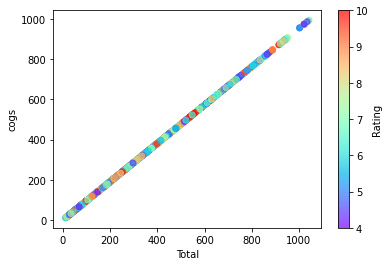

In [ ]:
rainbow_scatter(missingdf, 'Total', 'cogs')

We can confirm that Total and cogs have a very strong linear relation

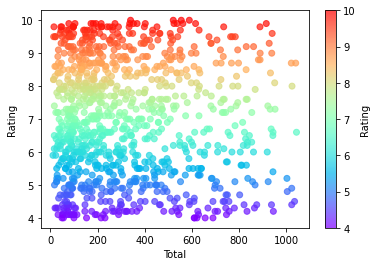

In [ ]:
rainbow_scatter(missingdf, 'Total', 'Rating')

We can confirm that there is no relation at all between Rating and Total

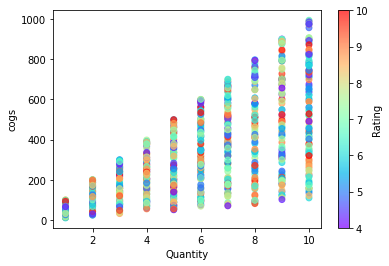

In [ ]:
rainbow_scatter(missingdf, 'Quantity', 'cogs')

While cogs and Quantity do not necessarily have a strong linear relation, and increase and decrease with each, quantity still effects cogs and their relation can be described using equation: cogs=Unit price*Quantity

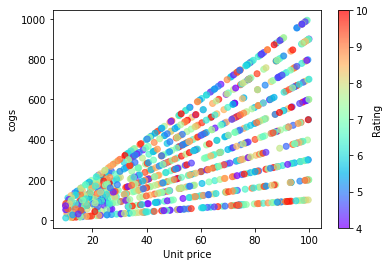

In [ ]:
rainbow_scatter(missingdf, 'Unit price', 'cogs')

The same explanation as cogs and Quantity is applicable to cogs and Unit price i.e. they do not have a strong linear relation, but their relation can be quantified via an equation.


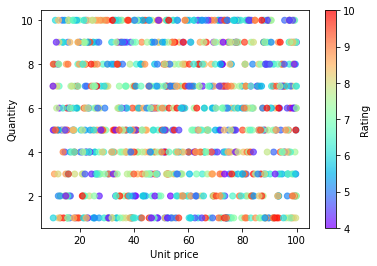

In [ ]:
rainbow_scatter(missingdf, 'Unit price', 'Quantity')

There is no linear relationship between Quantity and Unit price

In [ ]:
#We perform chi square test between Branch and City to see their relation
#we find that the p-value<0.05, indicating a very strong relation between the two.
#as we can see later on, each unique branch has a corresponding unique city

chi_square_test("Branch", "City", missingdf)

Chi-square test statistic:  1954.0000000000002
p-value:  0.0
Degrees of freedom:  4
Expected frequencies: 
 [[109.08085977 110.10030706 112.81883316]
 [105.4667349  106.45240532 109.08085977]
 [106.45240532 107.44728762 110.10030706]]


In [ ]:
#we perform chi test between Gender and Customer type

chi_square_test("Gender", "Customer type", missingdf)

Chi-square test statistic:  1.2367893726101225
p-value:  0.2660907183799471
Degrees of freedom:  1
Expected frequencies: 
 [[247.74772957 246.25227043]
 [249.25227043 247.74772957]]


In [ ]:
#we perform chi test between gender and payment

chi_square_test("Gender", "Payment", missingdf)

Chi-square test statistic:  2.837743556610385
p-value:  0.24198687778968478
Degrees of freedom:  2
Expected frequencies: 
 [[168.5 153.  167.5]
 [168.5 153.  167.5]]


In [ ]:
#we perform chi test between Gender and City

chi_square_test("Gender", "City", missingdf)

Chi-square test statistic:  3.4371225710608115
p-value:  0.17932395838286558
Degrees of freedom:  2
Expected frequencies: 
 [[160.85106383 161.34751773 167.80141844]
 [163.14893617 163.65248227 170.19858156]]


In [ ]:
#we perform chi test between City and Customer type

chi_square_test("City", "Customer type", missingdf)

Chi-square test statistic:  0.4255622685969983
p-value:  0.8083330342340213
Degrees of freedom:  2
Expected frequencies: 
 [[164.16967871 164.83032129]
 [163.17168675 163.82831325]
 [169.65863454 170.34136546]]


In [ ]:
#we perform chi test between Gender and Product line

chi_square_test("Gender", "Product line", missingdf)

Chi-square test statistic:  6.171412157670018
p-value:  0.2898953447934311
Degrees of freedom:  5
Expected frequencies: 
 [[83.3306288  88.81947262 85.32657201 75.34685598 76.84381339 82.3326572 ]
 [83.6693712  89.18052738 85.67342799 75.65314402 77.15618661 82.6673428 ]]


In [ ]:
#we perform chi test between Customer type and Product line

chi_square_test("Customer type", "Product line", missingdf)

Chi-square test statistic:  3.1747536121309703
p-value:  0.6730644629026804
Degrees of freedom:  5
Expected frequencies: 
 [[84.75477387 89.26834171 86.25929648 76.22914573 79.73969849 82.74874372]
 [84.24522613 88.73165829 85.74070352 75.77085427 79.26030151 82.25125628]]


In [ ]:
#we perform chi test between City and Product line

chi_square_test("City", "Product line", missingdf)

Chi-square test statistic:  11.3167282777943
p-value:  0.3333801970708515
Degrees of freedom:  10
Expected frequencies: 
 [[55.93541877 58.91422805 56.59737639 50.30877901 52.29465187 53.94954591]
 [55.25327952 58.19576186 55.90716448 49.69525732 51.65691221 53.29162462]
 [57.81130172 60.89001009 58.49545913 51.99596367 54.04843592 55.75882947]]


In [ ]:
# we perform a chi test between product line and payment 

chi_square_test("Payment", "Product line", missingdf)

Chi-square test statistic:  9.862556145705836
p-value:  0.4526334450335395
Degrees of freedom:  10
Expected frequencies: 
 [[56.97046843 60.0407332  57.65274949 51.17107943 53.21792261 55.94704684]
 [52.88900204 55.73930754 53.52240326 47.50509165 49.40529532 51.9389002 ]
 [57.14052953 60.21995927 57.82484725 51.32382892 53.37678208 56.11405295]]




1.   Only Branch and City showed a strong relation with a p-value of 0.0. That makes sense, considering each value of Branch has a unique corresponsing value of city
2.   Rest of the attributes showed a very weak relation with a p-value>0.05 by a large margin. Thus, we could conclude that later on, during our missing value analysis, we could disregard these relations. 



In [ ]:
#we use the API for anova test we made above to check for relation between Quantity and Gender
anova_test("Quantity", "Gender", missingdf)

                sum_sq     df         F   PR(>F)
C(Gender)    49.938389    1.0  5.888397  0.01542
Residual   8319.677074  981.0       NaN      NaN


In [ ]:
#we find the mean quantity for each gender here to check if the difference is very significant.
#this was brought on by the ANOVA test giving us a p-value of 0.01 which is less than 0.05.
#however, we noticed that the means are not too significantly different, allowing us to disregard the possibility of
#a correlation between gender and quantity

missingdf.groupby('Gender')['Quantity'].mean()

Gender
Female    5.738241
Male      5.287449
Name: Quantity, dtype: float64

In [ ]:
#we perform anova between Rating and Branch

anova_test("Rating", "Branch", missingdf)

                sum_sq     df        F    PR(>F)
C(Branch)     9.443617    2.0  1.60565  0.201291
Residual   2858.404650  972.0      NaN       NaN


In [ ]:
#we perform anova between Rating and Gender

anova_test("Rating", "Gender", missingdf)

                sum_sq     df         F    PR(>F)
C(Gender)     0.029930    1.0  0.010167  0.919706
Residual   2893.898334  983.0       NaN       NaN


In [ ]:
#we perform anova between Rating and payment

anova_test("Rating", "Payment", missingdf)

                 sum_sq     df         F    PR(>F)
C(Payment)     0.271591    2.0  0.045841  0.955195
Residual    2897.118501  978.0       NaN       NaN


In [ ]:
#perform anova test between Quantity and Product line. 
#we could not use the API we made above due to presence of space in the column name

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Q("Quantity") ~ C(Q("Product line"))', data=missingdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Quantity - Product line")
display(anova_table)


Anova => Quantity - Product line


,sum_sq,df,F,PR(>F)
"C(Q(""Product line""))",43.781146,5.0,1.024925,0.401519
Residual,8380.962521,981.0,NaN,NaN


In [ ]:
#we perform anova between unit price and product line

model = ols('Q("Unit price") ~ C(Q("Product line"))', data=missingdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Quantity - Product line")
display(anova_table)


Anova => Quantity - Product line


,sum_sq,df,F,PR(>F)
"C(Q(""Product line""))",1362.541024,5.0,0.384656,0.859513
Residual,694985.371935,981.0,NaN,NaN


In [ ]:
#perform anova between rating and product line

model = ols('Rating ~ C(Q("Product line"))', data=missingdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Quantity - Product line")
display(anova_table)


Anova => Quantity - Product line


,sum_sq,df,F,PR(>F)
"C(Q(""Product line""))",8.094425,5.0,0.548843,0.739294
Residual,2899.491075,983.0,NaN,NaN




1.   As we ran ANOVA between different columns where it made sense to check relation, we found out that there were no relations between most of the column
2.   Only Gender and Quantity had a p-value<0.05 which we then inspected further to see what the mean for each Gender was and both were not as different. We will run the ANOVA test again after Quantity missing values have been filled to ensure the relation between Gender and Quantity still stands.
3.   Tukey test could not be performed at this stage as missing values had not been dealt with yet.





# Missing Values

**Note: These mano graphs were made before the data was touched. Even before we dealt with the data inconsistencies and introduced more NaNs**

<AxesSubplot:>

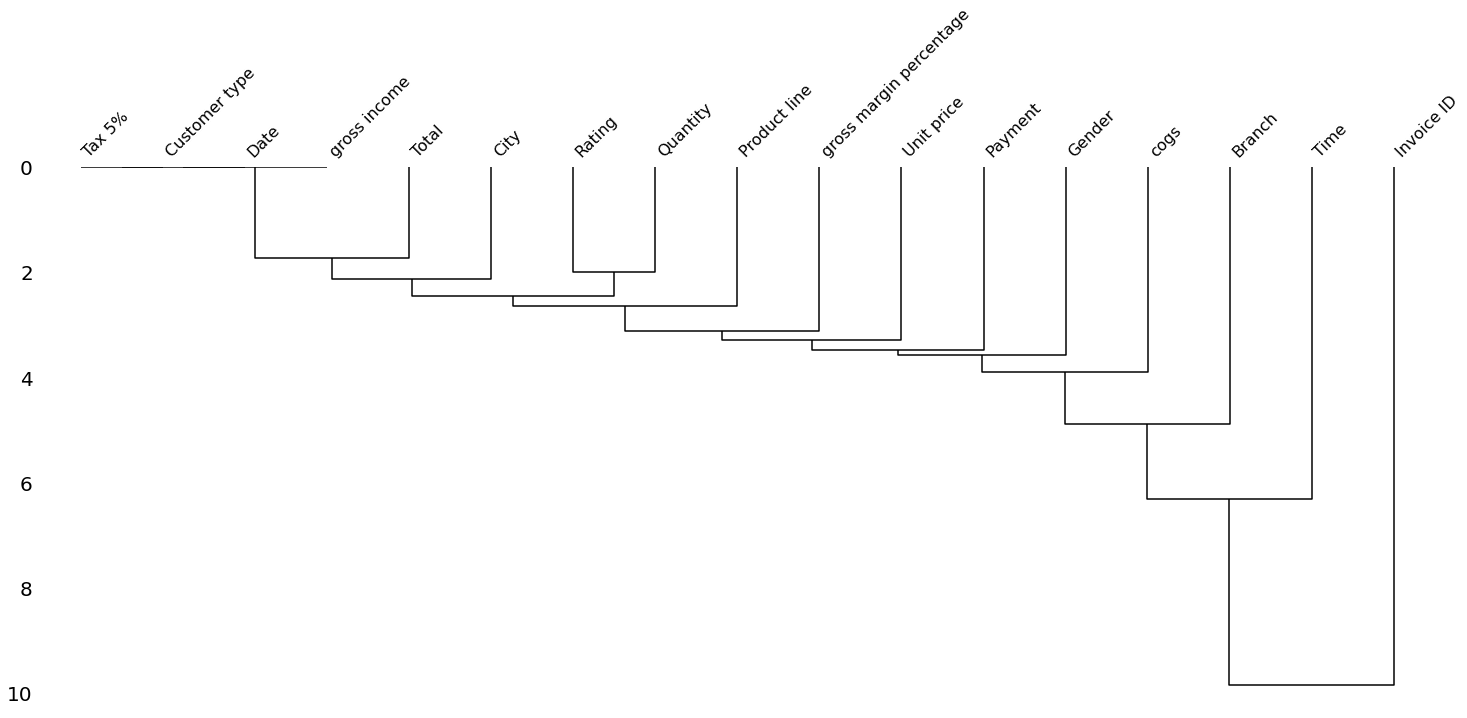

In [ ]:
mano.dendrogram(missingdf)

<AxesSubplot:>

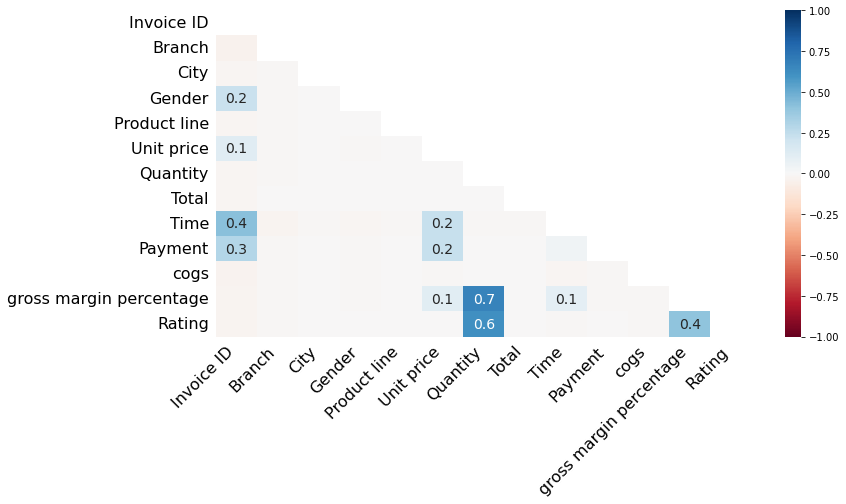

In [ ]:
mano.heatmap(missingdf, figsize=(12,6))

<AxesSubplot:>

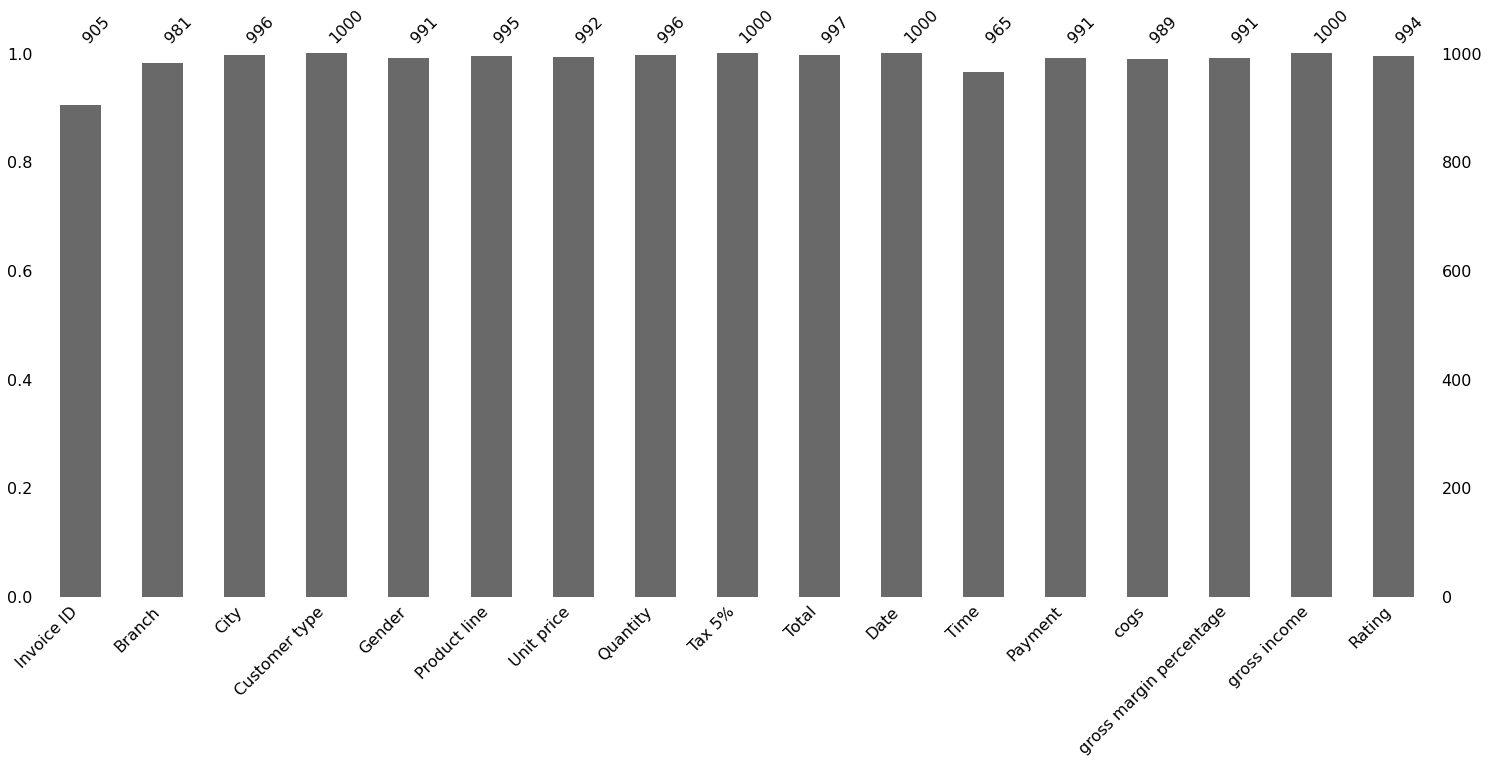

In [ ]:
mano.bar(missingdf)

<AxesSubplot:>

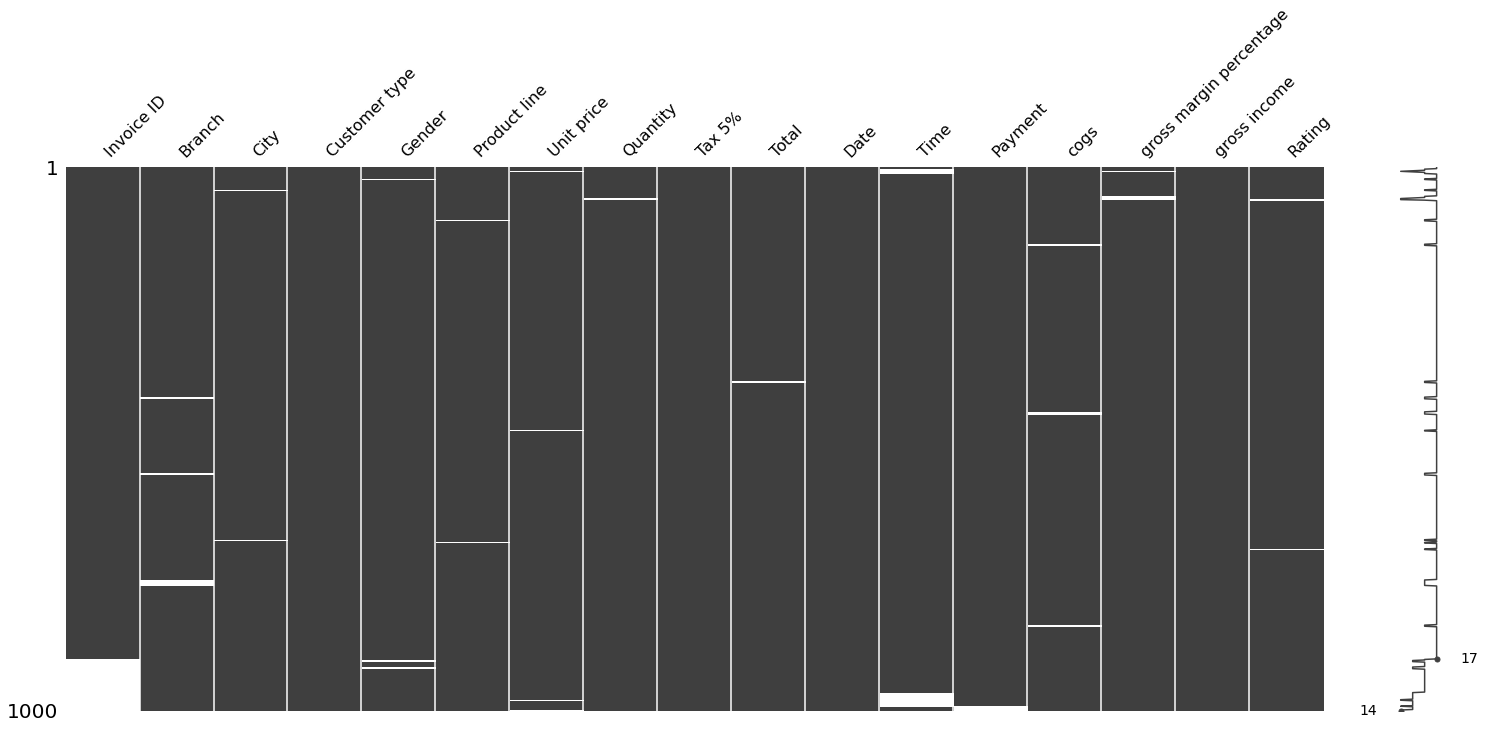

In [ ]:
mano.matrix(missingdf)

**The following mano graphs were made after we dealt with data entry errors and inconsistencies**

<AxesSubplot:>

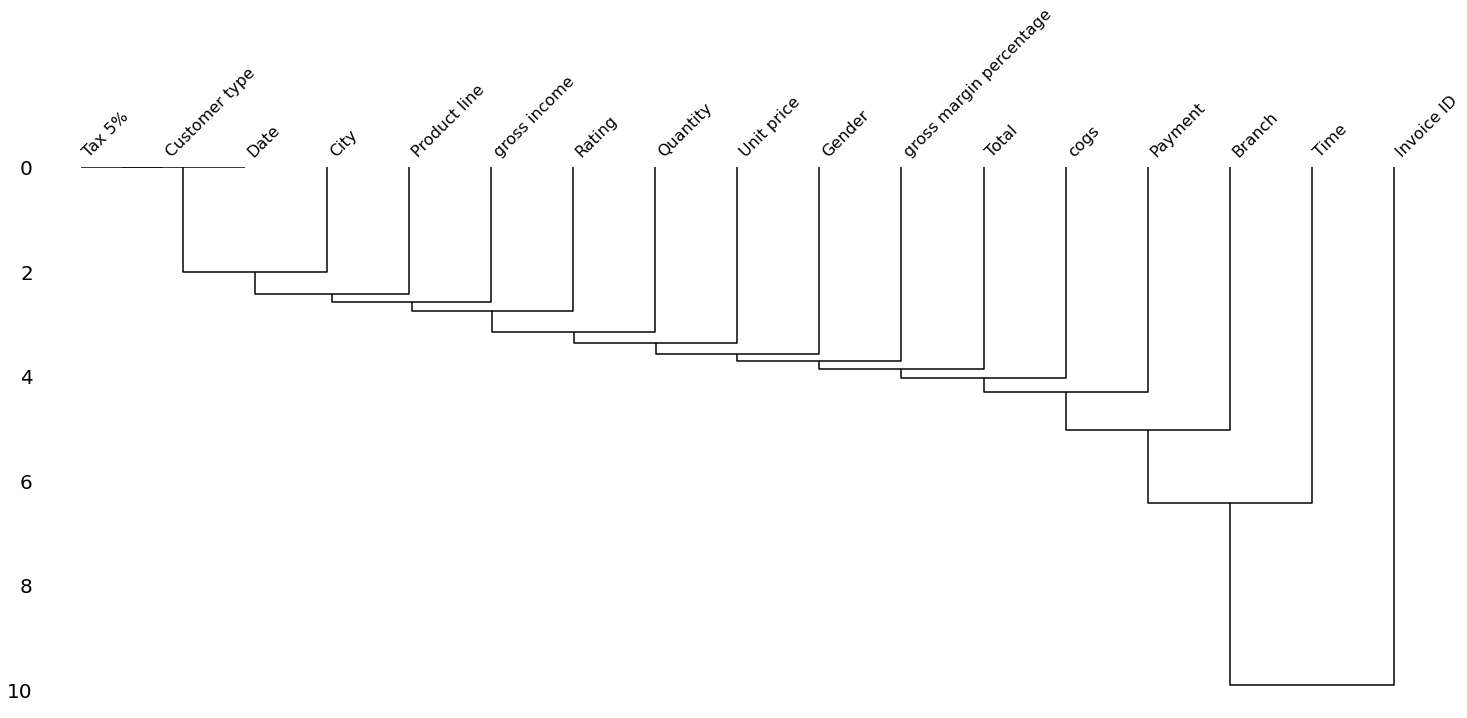

In [ ]:
mano.dendrogram(missingdf)

<AxesSubplot:>

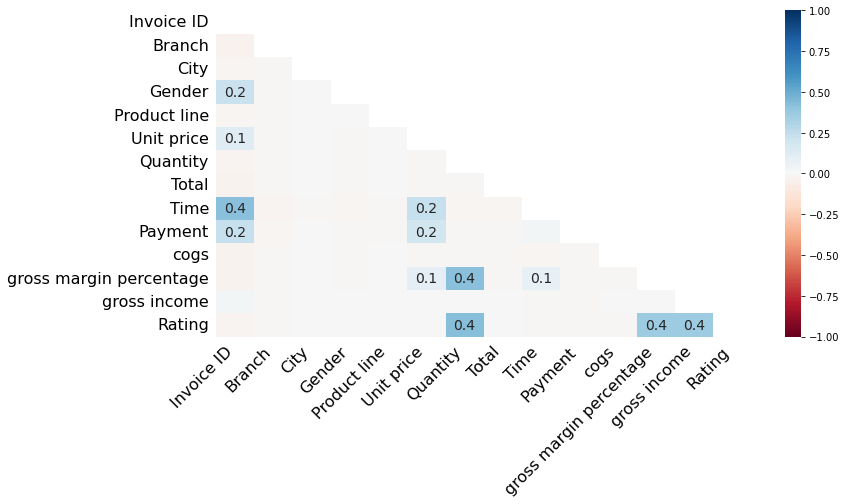

In [ ]:
mano.heatmap(missingdf, figsize=(12,6))

<AxesSubplot:>

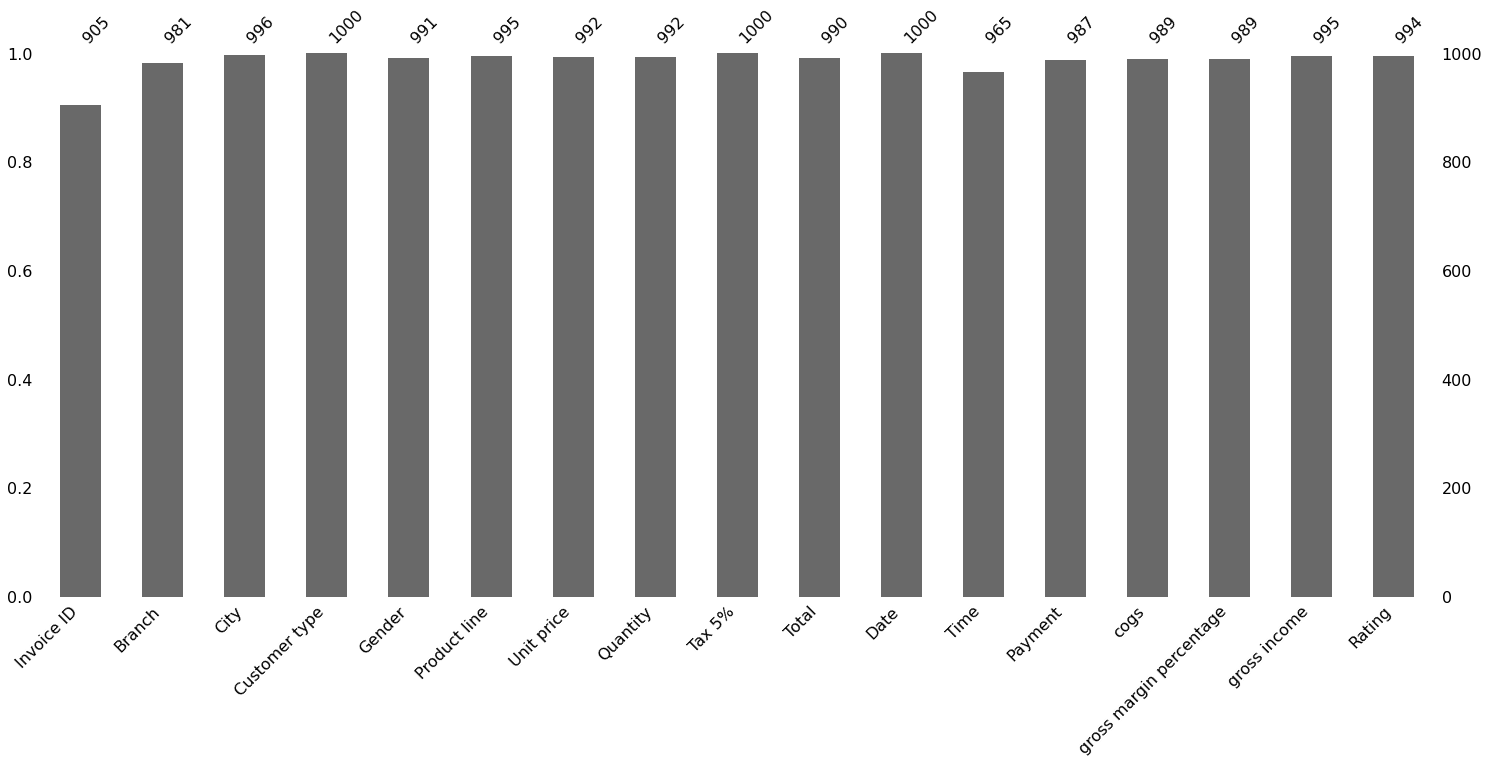

In [ ]:
mano.bar(missingdf)

<AxesSubplot:>

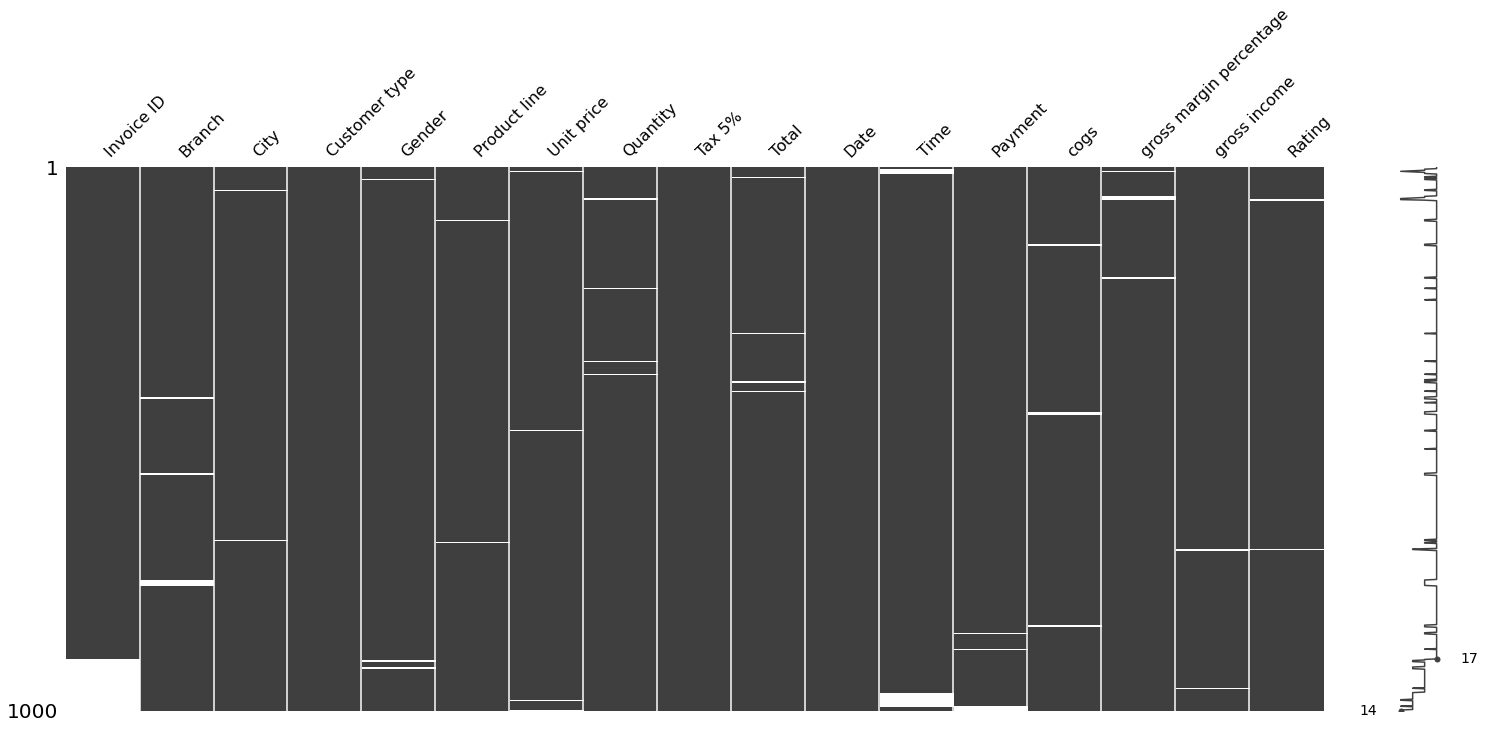

In [ ]:
mano.matrix(missingdf)

In [ ]:
missing_invoice_ids = missingdf[missingdf['Invoice ID'].isnull()]
# Set the display options to show all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(missing_invoice_ids)


    Invoice ID Branch       City Customer type  Gender  \
905        NaN      C  Naypyitaw        Member  Female   
906        NaN      C  Naypyitaw        Normal    Male   
907        NaN      B   Mandalay        Normal     NaN   
908        NaN      A     Yangon        Member     NaN   
909        NaN      B   Mandalay        Normal     NaN   
910        NaN      B   Mandalay        Member  Female   
911        NaN      C  Naypyitaw        Normal  Female   
912        NaN      A     Yangon        Normal  Female   
913        NaN      A     Yangon        Member    Male   
914        NaN      A     Yangon        Member  Female   
915        NaN      C  Naypyitaw        Normal  Female   
916        NaN      C  Naypyitaw        Member    Male   
917        NaN      A     Yangon        Normal  Female   
918        NaN      B   Mandalay        Normal    Male   
919        NaN      B   Mandalay        Member     NaN   
920        NaN      C  Naypyitaw        Member     NaN   
921        NaN

In [ ]:
missing_invoice_ids = missingdf[missingdf['Branch'].isnull()]
# Set the display options to show all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(missing_invoice_ids)


      Invoice ID Branch       City Customer type  Gender  \
423  301-81-8610    NaN   Mandalay        Member    Male   
424  489-64-4354    NaN  Naypyitaw        Normal    Male   
425  198-84-7132    NaN   Mandalay        Member    Male   
426  269-10-8440    NaN     Yangon        Member    Male   
563  760-90-2357    NaN     Yangon        Member    Male   
564  514-37-2845    NaN   Mandalay        Normal    Male   
565  698-98-5964    NaN     Yangon        Normal  Female   
566  718-57-9773    NaN  Naypyitaw        Normal  Female   
759  156-95-3964    NaN     Yangon        Normal  Female   
760  842-40-8179    NaN   Mandalay        Member  Female   
761  525-09-8450    NaN   Mandalay        Normal    Male   
762  410-67-1709    NaN     Yangon        Member  Female   
763  587-73-4862    NaN     Yangon        Member  Female   
764  787-87-2010    NaN     Yangon        Member    Male   
765  593-14-4239    NaN   Mandalay        Normal  Female   
766  801-88-0346    NaN  Naypyitaw      

In [ ]:
missing_invoice_ids = missingdf[missingdf['Time'].isnull()]
# Set the display options to show all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(missing_invoice_ids)


      Invoice ID Branch       City Customer type  Gender  \
4    373-73-7910      A     Yangon        Normal    Male   
5    699-14-3026      C  Naypyitaw        Normal    Male   
6    355-53-5943      A     Yangon        Member  Female   
7    315-22-5665      C  Naypyitaw        Normal  Female   
8    665-32-9167      A     Yangon        Member  Female   
9    692-92-5582      B   Mandalay        Member  Female   
10   351-62-0822      B   Mandalay        Member  Female   
11   529-56-3974      B   Mandalay        Member    Male   
12   365-64-0515      A     Yangon        Normal  Female   
966          NaN      A     Yangon        Normal  Female   
967          NaN      A     Yangon        Member    Male   
968          NaN      A     Yangon        Normal  Female   
969          NaN      B   Mandalay        Member  Female   
970          NaN      B   Mandalay        Member  Female   
971          NaN      B   Mandalay        Member    Male   
972          NaN      B   Mandalay      

In [ ]:
missing_invoice_ids = missingdf[missingdf['Gender'].isnull()]
# Set the display options to show all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(missing_invoice_ids)


      Invoice ID Branch       City Customer type Gender  \
22   273-16-6619      B   Mandalay        Normal    NaN   
23   636-48-8204      A     Yangon        Normal    NaN   
907          NaN      B   Mandalay        Normal    NaN   
908          NaN      A     Yangon        Member    NaN   
909          NaN      B   Mandalay        Normal    NaN   
919          NaN      B   Mandalay        Member    NaN   
920          NaN      C  Naypyitaw        Member    NaN   
921          NaN      B   Mandalay        Normal    NaN   
922          NaN      C  Naypyitaw        Member    NaN   

               Product line  Unit price  Quantity   Tax 5%     Total  \
22       Home and lifestyle       33.20       2.0   3.3200   69.7200   
23   Electronic accessories       34.56       5.0   8.6400  181.4400   
907       Health and beauty       82.88       5.0  20.7200  435.1200   
908      Food and beverages       79.54       2.0   7.9540  167.0340   
909      Home and lifestyle       49.01      10.0

 

1.   The above mano matrices indicate no such pattern of missing values
3.   We can rule out MAR and MNAR because we do not see a systematic pattern of missigness in the values of different columns. It all seems to be entirely random, leading us to conclude MCAR. The strategy we employ is according to our inference.
3.   Moreover, as not a huge chunk of data is missing for any column, no column or row is rendered useless





## Strategising dealing with missing values

1.   There is not one-for-all strategy for dealing with missing values.
2.   Each column is dealt with separately, the reason is explained in comments of that code
3.   After each missing value strategy, we run the missingdf.isnull().sum() function to ensure missing values were filled



In [ ]:
#first we see all the columns that have missing values that need to be dealt with

missingdf.isnull().sum()

Invoice ID                 95
Branch                     19
City                        4
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    8
Tax 5%                      0
Total                      10
Date                        0
Time                       35
Payment                    13
cogs                       11
gross margin percentage    11
gross income                5
Rating                      6
dtype: int64

In [ ]:
#Here we are filling missing values of Branch logically using their corresponding cities. 
#As we observed the dataset, one Branch is associated with a unique city
#Yangon and Branch 'A' were corresponding
#Mandalay and Branch 'B' correspond
#Naypyitaw and Branch 'C' correspond

missingdf.loc[missingdf['City'] == 'Yangon', 'Branch'] = missingdf.loc[missingdf['City'] == 'Yangon', 'Branch'].fillna('A')
missingdf.loc[missingdf['City'] == 'Mandalay', 'Branch'] = missingdf.loc[missingdf['City'] == 'Mandalay', 'Branch'].fillna('B')
missingdf.loc[missingdf['City'] == 'Naypyitaw', 'Branch'] = missingdf.loc[missingdf['City'] == 'Naypyitaw', 'Branch'].fillna('C')

In [ ]:
#As done with Branch, we use the same strategy for filling City on the basis on Branch, just vice versa now

missingdf.loc[missingdf['Branch'] == 'A', 'City'] = missingdf.loc[missingdf['Branch'] == 'A', 'City'].fillna('Yangon')
missingdf.loc[missingdf['Branch'] == 'B', 'City'] = missingdf.loc[missingdf['Branch'] == 'B', 'City'].fillna('Mandalay')
missingdf.loc[missingdf['Branch'] == 'C', 'City'] = missingdf.loc[missingdf['Branch'] == 'C', 'City'].fillna('Naypyitaw')

In [ ]:
#we have ensured that Branch and City are filled now

missingdf.isnull().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    8
Tax 5%                      0
Total                      10
Date                        0
Time                       35
Payment                    13
cogs                       11
gross margin percentage    11
gross income                5
Rating                      6
dtype: int64

In [ ]:
#We noticed that the values in gross income were the same as those in Tax 5%. 
#Therefore, for each missing value we logically fill that with its corresponding Tax 5% value, which has no NaNs
#We also intend to drop the column later on, as it is redundant

missingdf['gross income'] = missingdf['gross income'].fillna(missingdf['Tax 5%'])

In [ ]:
#to ensure gross income is filled

missingdf.isnull().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    8
Tax 5%                      0
Total                      10
Date                        0
Time                       35
Payment                    13
cogs                       11
gross margin percentage    11
gross income                0
Rating                      6
dtype: int64

In [ ]:
#Here, we are ensuring if each Invoice ID is indeed unique or if one ID can have multiple entries

num_unique = missingdf['Invoice ID'].nunique()

# print number of unique values
print("Number of unique values in 'Invoice ID' column:", num_unique)

Number of unique values in 'Invoice ID' column: 905


In [ ]:
#We identified that each Invoice ID was indeed unique as the number of unique values was 905. 
#Invoice ID has 95 missing values, leaving us with 905 valid values. All those are unique
#So here, we made a function that generated random and unique Invoice IDs. 

import random

# loop over rows in the DataFrame
for index, row in missingdf.iterrows():
    # check if cell in the 'Invoice ID' column is empty
    if pd.isnull(row['Invoice ID']):
        # generate a new value and store it in the cell
        while True:
            first_part = random.randint(100, 999)
            second_part = random.randint(10, 99)
            third_part = random.randint(1000, 9999)
            value = f"{first_part}-{second_part}-{third_part}"
            if value not in missingdf['Invoice ID'].unique():
                missingdf.at[index, 'Invoice ID'] = value
                break

In [ ]:
#We ensure that each ID generated to fill the missing value was unique

num_unique = missingdf['Invoice ID'].nunique()

# print number of unique values
print("Number of unique values in 'Invoice ID' column:", num_unique)

Number of unique values in 'Invoice ID' column: 1000


In [ ]:
#Ensuring Invoice ID has also been filled

missingdf.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    8
Tax 5%                      0
Total                      10
Date                        0
Time                       35
Payment                    13
cogs                       11
gross margin percentage    11
gross income                0
Rating                      6
dtype: int64

In [ ]:
#We found out the relation between Unit price was such:
#Unit price=(Total-Tax 5%)/Quantity
#Therefore, no imputation method was required and we could logically fill the missing values of Unit Price by 
#using corresponding values of aforementioned columns in the given equation

missingdf['Unit price'].fillna((missingdf['Total'] - missingdf['Tax 5%']) / missingdf['Quantity'], inplace=True)

In [ ]:
#We found out the relation between gross margin percentage was such:
#gross margin parcentage=((Total-cogs)/Total)*100
#Therefore, no imputation method was required and we could logically fill the missing values of gross margin percentage by 
#using corresponding values of aforementioned columns in the given equation

missingdf['gross margin percentage'].fillna(((missingdf['Total'] - missingdf['cogs']) / missingdf['Total'])*100, inplace=True)

In [ ]:
#We found out the relation between cogs was such:
#cogs=Unit price*Quantity
#Therefore, no imputation method was required and we could logically fill the missing values of cogs by 
#using corresponding values of aforementioned columns in the given equation

missingdf['cogs'].fillna(missingdf['Unit price'] * missingdf['Quantity'], inplace=True)

In [ ]:
#We found out the relation between Quantity was such:
#Quantity=cogs/Unit price
#Therefore, no imputation method was required and we could logically fill the missing values of Quantity by 
#using corresponding values of aforementioned columns in the given equation

missingdf['Quantity'].fillna(missingdf['cogs'] / missingdf['Unit price'], inplace=True)

In [ ]:
#We found out the relation between Total was such:
#Total=(Unit price*Quantity)+(Unit price*Quantity*0.05)
#Therefore, no imputation method was required and we could logically fill the missing values of Quantity by 
#using corresponding values of aforementioned columns in the given equation

missingdf['Total'].fillna((missingdf['Unit price'] * missingdf['Quantity']) + (missingdf['Unit price']*missingdf['Quantity']*0.05), inplace=True)

In [ ]:
#ensure Total, cogs, Unit price, Quantity, gross margin percentage are all filled

missingdf.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type               0
Gender                      9
Product line                5
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                    13
cogs                        0
gross margin percentage     0
gross income                0
Rating                      6
dtype: int64

In [ ]:
#we use the API for anova test again to check if the relation holds after dealing
#with the missing values in Quantity between Quantity and Gender

anova_test("Quantity", "Gender", missingdf)

                sum_sq     df         F    PR(>F)
C(Gender)    46.448843    1.0  5.459012  0.019667
Residual   8415.058725  989.0       NaN       NaN


In [ ]:
missingdf.groupby('Gender')['Quantity'].mean()

Gender
Female    5.732794
Male      5.299799
Name: Quantity, dtype: float64



1.   Quantity NaNs were replaced logically through formula, therefore did not require any imputation. 
2.   However, to replace the Gender NaN, we employ KNN Imputation because the missing data is very small and does not indicate a MNAR pattern
3.  We also perform KNN Imputation for Product line and Payment for the same reasons



In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Select the categorical columns to impute
cat_cols = ['Gender', 'Product line', 'Payment']
X = missingdf[cat_cols]

# Encode the categorical data as ordinal values
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Fit the KNN imputer to the data
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_encoded)

# Impute the missing values in the categorical columns
X_imputed = imputer.transform(X_encoded)
missingdf[cat_cols] = encoder.inverse_transform(X_imputed)


In [ ]:
#Ensure Gender, Payment, Product line were filled

missingdf.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      6
dtype: int64

In [ ]:
#we perform KNN Imputation for Rating because its missigness did not seem to indicate a pattern
#or seem to have a relation.
#Moreover, the missing data is very small (6)

from sklearn.impute import KNNImputer
imputer = KNNImputer (n_neighbors=2)
missingdf_knn = missingdf.copy(deep=True)
missingdf_knn[['Rating']] = imputer.fit_transform(missingdf_knn[['Rating']])
missingdf = missingdf_knn


In [ ]:
#Ensure Rating is filled

missingdf.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [ ]:
#We use the API made above to generate random time values between 10:00 and 20:59 (the minimum and maximum time
#observed in the dataset). 
#Time was generated randomly as we could not decipher if data was missing for a specific chunk of time
#Moreover, we believe that the randomly filled missing values will not cause a significant difference to 
#the analysis of this dataset

missingdf['Time'] = generate_random_times(missingdf['Time'])

<ipython-input-8-e74fc5e4488a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col.loc[missing_mask] = random_time_strs


In [ ]:
#Ensure Time is filled

missingdf.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Univariate Analysis Post Missing Values

Here we make the normality plots, kurtosis, and skew for numerical columns again to see if the missing value strategy was successful i.e. did not affect the distribution of the columns too much




Unit price Kurtosis: -1.2185010010253237
Unit price Skewness: 0.0070668272550450705


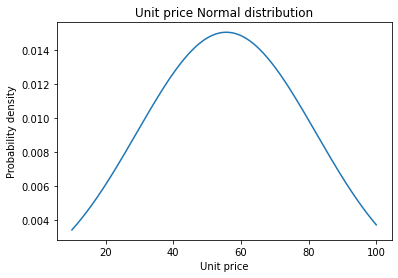

Quantity Kurtosis: -1.2154719990982255
Quantity Skewness: 0.012921628351325404


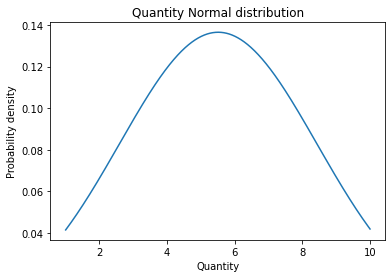

Tax 5% Kurtosis: -0.08746991289328898
Tax 5% Skewness: 0.8912303920037635


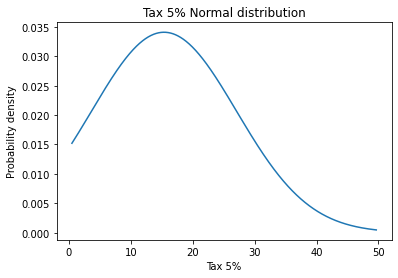

Total Kurtosis: -0.08746991289329031
Total Skewness: 0.8912303920037631


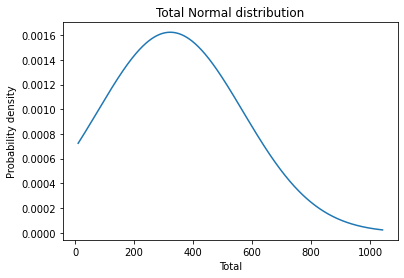

cogs Kurtosis: -0.08746991289328943
cogs Skewness: 0.8912303920037631


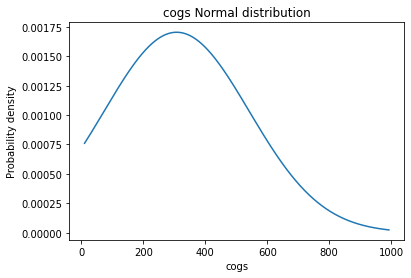

gross margin percentage Kurtosis: 85.91864131554591
gross margin percentage Skewness: -9.376452127246807


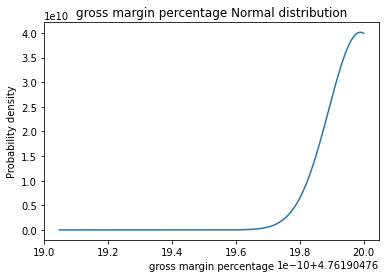

gross income Kurtosis: -0.08746991289328898
gross income Skewness: 0.8912303920037635


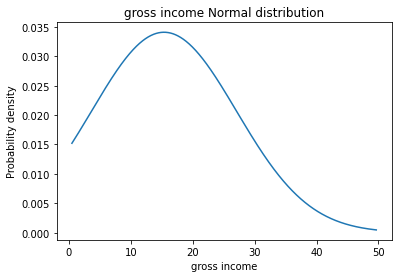

Rating Kurtosis: -1.1374880033996566
Rating Skewness: 0.008324039709279913


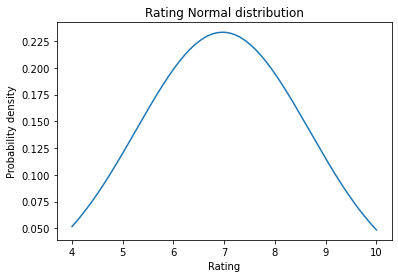

In [ ]:
normality_plots(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating'], missingdf)

As we can judge from the normality plots obtained above, our missing value strategies were successful because the distribution (including kurtosis and skew) have remained largely similar.

Make the bar graphs again to check if the frequency table of categorical columns was affected too much

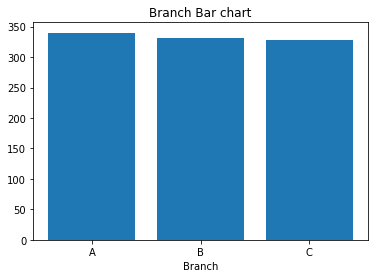

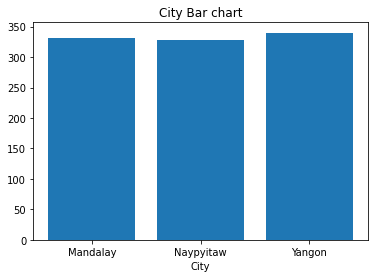

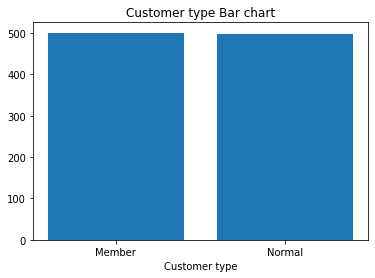

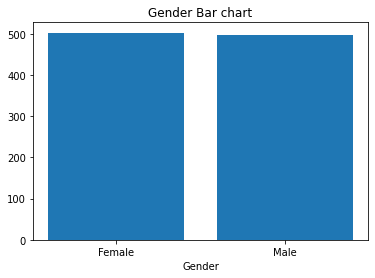

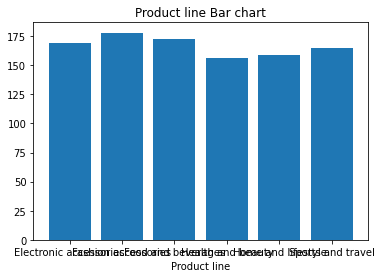

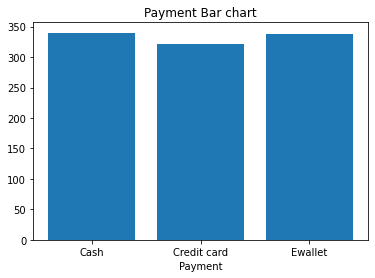

In [ ]:
bar_plots(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], missingdf)

The bar graphs for categorical columns have also remained the same, indicating a successful missing value strategy

# Drop extra columns and export the clean data



We drop 'gross income' column as the values are identical to Tax 5%



In [ ]:
missingdf.drop('gross income', axis=1, inplace=True)

In [ ]:
# export the cleaned dataset
missingdf.to_excel('supermarket_sales_clean.xlsx', index=False)
